## Assignment 3

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import PIL

## Data Load

In [2]:
data = gdal.Open('VOL-ALPSRP074050510-H1.1__A')

In [3]:
HH,HV = data.ReadAsArray()                 # HH and HV directly assigned as there are only 2 layers in data
print(HH.shape)
amplitude = np.absolute(HH)**2             # Aplitude after getting mod of complex numbert square gives intenisty
amplitude = np.log(amplitude)
phase = np.angle(HH,deg = True)            # Getting phase from HB layer
amplitude = amplitude[9000:11000,2000:2400]# Croping the image of interest
phase = phase[9000:11000,2000:2400]

(18432, 4640)


/home/vaibhav/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [4]:
amplitude.shape                            # New shape of image for better resolution

(2000, 400)

(2000, 400)


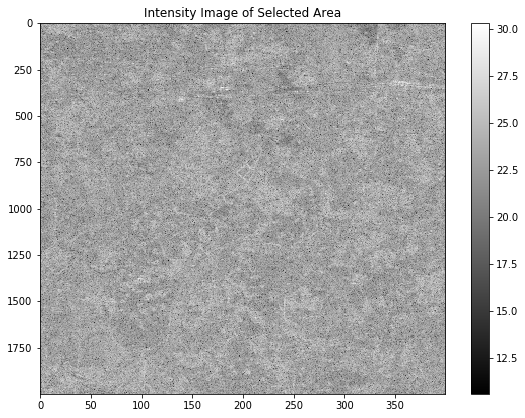

In [5]:
print(amplitude.shape)
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Intensity Image of Selected Area")
plt.imshow(amplitude,cmap = "gray", aspect='auto')
plt.colorbar()

## Multi-look defined 

In [6]:
def MultiLook(im,multlook_factor = 5):     # taking the multi-look factor for ALOS PALSAR to be 5
    
    new_im = np.arange(int(im.shape[0]/multlook_factor)*im.shape[1]).reshape(int(im.shape[0]/multlook_factor),im.shape[1])
    for y in range(0,im.shape[1]):
        pos = 0
        for x in range(0,im.shape[0],multlook_factor):
            temp = np.mean(im[x:x+multlook_factor,y])
            
            try:
                new_im[pos,y] = temp
            except IndexError:
                pass
            
            pos+=1
            
    return new_im    

In [7]:
amplitude = MultiLook(amplitude)

## Padding function 

In [8]:
def pad_with(vector, pad_width, iaxis, kwargs): ## Padding functin as np.pad
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

amplitude = np.pad(amplitude, 1, pad_with)

In [9]:
amplitude.shape                                 ## After padding

(402, 402)

## Kernel

### These equations makes up the  Lee-Filter
<b>temp</b> = image[i:i+m, j:j+m] <br>
<b>sigma_k</b> = np.var(temp) <br>
<b>k_bar</b> = np.mean(temp) <br>
<b>C</b> = temp[1][1]         <br>
<b>new_image[i][j]</b> = k_bar + (sigma_k/(sigma_k + sigma))*(C - k_bar) <br>

## Convolution

In [10]:
def convolution(image):                         ## Convolution for image 
    sigma = np.var(image)
    m, n = 3,3
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                temp = image[i:i+m, j:j+m]
                sigma_k = np.var(temp)
                k_bar = np.mean(temp)
                C = temp[1][1]
                new_image[i][j] = k_bar + (sigma_k/(sigma_k + sigma))*(C - k_bar)
    return new_image

new_image = convolution(amplitude)

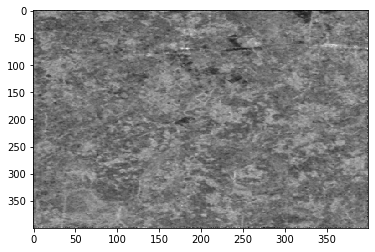

In [11]:
plt.imshow(new_image,cmap = "gray", aspect='auto')

## Comparison

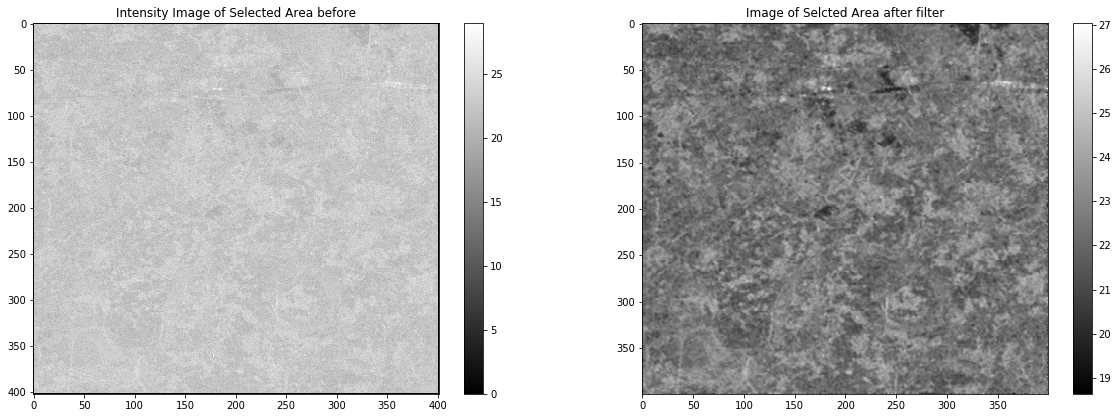

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Intensity Image of Selected Area before")
plt.imshow(amplitude,cmap = "gray", aspect='auto')
plt.colorbar()

plt.subplot(2,2,2)
plt.title("Image of Selcted Area after filter")
plt.imshow(new_image ,cmap = "gray",aspect='auto')
plt.colorbar()